## Data Cleanup & Analysis

The analysis process can be broken into two broad phases: **Exploration & Cleanup** and **Analysis** proper.

As you've learned, you'll need to explore, clean, and reformat your data before you can begin to answer your research questions. We recommend keeping track of these exploration and cleanup steps in a dedicated Jupyter Notebook, both for organization's sake and to make it easier to  present your work later.

Similarly, after you've massaged your data and are ready to start crunching numbers, you should keep track of your work in a Jupyter Notebook dedicated specifically to analysis.

During both phases, **don't forget to include plots**! Don't make the mistake of waiting to build figures until you're preparing your presentation. Creating them along the way can reveal insights and interesting trends in the data that you might not notice otherwise.

We recommend focusing your analysis on techniques such as aggregation, correlation, comparison, summary statistics, sentiment analysis, and time series analysis.


## Project Technical Requirements

The technical requirements for Project 1 are as follows.

*  Use Pandas to clean and format your data set(s)

*  Create a Jupyter Notebook describing the **data exploration and cleanup** process

*  Create a Jupyter Notebook illustrating the **final data analysis**

*  Use Matplotlib to create a total of 6-8 visualizations of your data (ideally, at least 2 per "question" you ask of your data)

*  Save PNG images of your visualizations to distribute to the class and instructional team, and for inclusion in your presentation

*  Optionally, use at least one API, if you can find an API with data pertinent to your primary research questions

*  Create a write-up summarizing your major findings. This should include a heading for each "question" you asked of your data, and under each heading, a short description of what you found and any relevant plots.


## Project Proposal

Use data for US Gun Violence from 2012-2014 to compare incidents involving guns in the state of Florida. Our group is searching for trends of seasonality, demographics, incident types and location.

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import statistics
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as sp
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import stats

## Data Reading & Clean-up

In [3]:
# File to Load
source_csv = "gun-violence-data.csv"

In [4]:
# Read File and store into Pandas data frame. Display dataframe
source_df = pd.read_csv(source_csv, encoding="ISO-8859-1")

In [5]:
# Display dataframe
source_df.head(5)

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


In [6]:
# Clean data. Remove hispanic column and placeholder column
source_df.drop(['Unnamed: 0', 'hispanic'], axis=1, inplace=True)
source_df.head(5)

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,4.0
1,2012,1,Suicide,0,F,21.0,White,Street,3.0
2,2012,1,Suicide,0,M,60.0,White,Other specified,4.0
3,2012,2,Suicide,0,M,64.0,White,Home,4.0
4,2012,2,Suicide,0,M,31.0,White,Other specified,2.0


In [7]:
# Replace education numbers with descriptions for better understanding. 
source_df['education'] = source_df['education'].apply({1:'Less than High School',2:'High School/GED',3:'Some College',4: 'College Graduate or above',5:'Unavailable'}.get)

# Similarly, replace 0 & 1 for police involvement
source_df['police'] = source_df['police'].apply({0:'False',1:'True'}.get)

# Display clean dataframe
source_df.head(5)

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,False,M,34.0,Asian/Pacific Islander,Home,College Graduate or above
1,2012,1,Suicide,False,F,21.0,White,Street,Some College
2,2012,1,Suicide,False,M,60.0,White,Other specified,College Graduate or above
3,2012,2,Suicide,False,M,64.0,White,Home,College Graduate or above
4,2012,2,Suicide,False,M,31.0,White,Other specified,High School/GED


## Education Breakdown

In [8]:
# Summary for education
edu_counts = source_df['education'].value_counts()
print(edu_counts)

High School/GED              42927
Less than High School        21823
Some College                 21680
College Graduate or above    12946
Unavailable                   1369
Name: education, dtype: int64


<IPython.core.display.Javascript object>


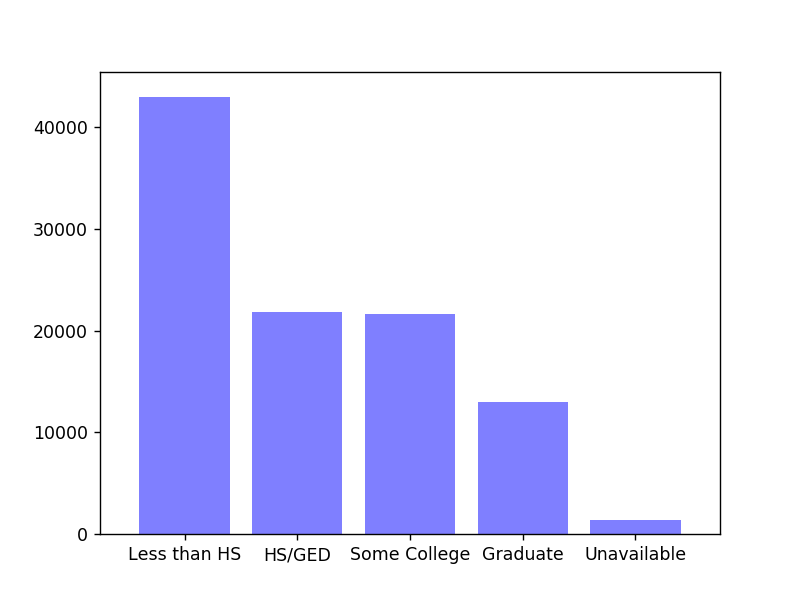

<BarContainer object of 5 artists>

In [9]:
# Set parameters for chart
edu_names = ["Less than High School", "High School/GED", "Some College", "College Graduate or above","Unavailable"]
edu_totals = [42927, 21823, 21680, 12946, 1369]
x_axis = np.arange(len(edu_totals))

# Plot data
plt.bar(x_axis, edu_totals, color='blue', alpha=0.5, align="center")

In [10]:
# Create categories
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Less than HS", "HS/GED", "Some College", "Graduate","Unavailable"])

([<matplotlib.axis.XTick at 0x14bdade1ec8>,
 <a list of 5 Text xticklabel objects>)

In [11]:
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-.25)

(-0.75, 4.75)

In [12]:
# Sets the y limits of the current chart
plt.ylim(0, max(edu_totals)+2500)

(0, 45427)

## Education Level by Age

<IPython.core.display.Javascript object>


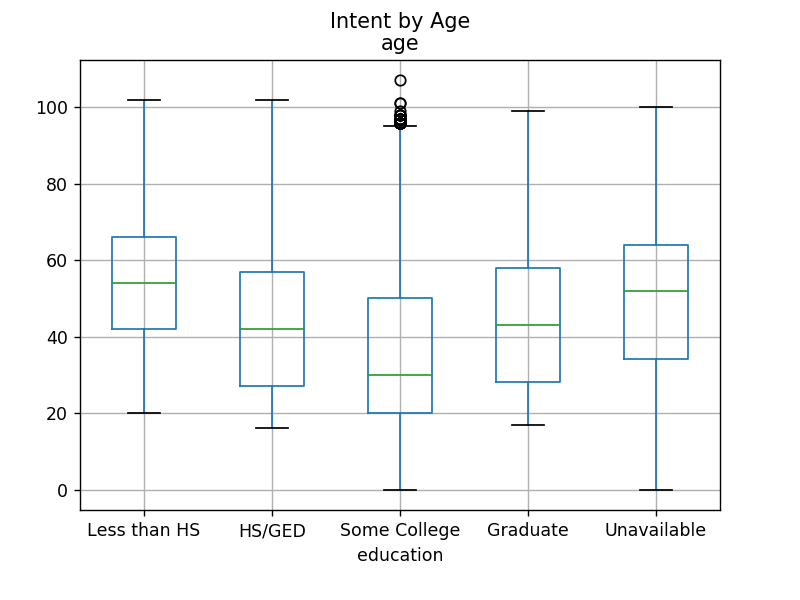

In [13]:
#Create boxplots by education level w/ age and edit parameters
bp = source_df.boxplot(column='age', by='education')
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Age by Education Level')
plt.xticks([1, 2, 3, 4, 5], ["Less than HS", "HS/GED", "Some College", "Graduate","Unavailable"])
plt.show()

In [14]:
#Get age stats for all groups. Display
age_stats = source_df['age'].describe()
print(age_stats)

count    100780.000000
mean         43.857601
std          19.496181
min           0.000000
25%          27.000000
50%          42.000000
75%          58.000000
max         107.000000
Name: age, dtype: float64


## Race & Education

In [15]:
#Contingency Table for test. Re-arrange 
contingency_table=pd.crosstab(source_df["education"],source_df["race"])
contingency_table = contingency_table[["Asian/Pacific Islander", "Black", "Hispanic", "Native American/Native Alaskan","White"]]

#Display
contingency_table

race,Asian/Pacific Islander,Black,Hispanic,Native American/Native Alaskan,White
education,,,,,
College Graduate or above,369,820,400,40,11317
High School/GED,377,10686,3206,392,28266
Less than High School,198,7572,3897,264,9892
Some College,346,3947,1377,207,15803
Unavailable,34,253,135,12,935


<IPython.core.display.Javascript object>


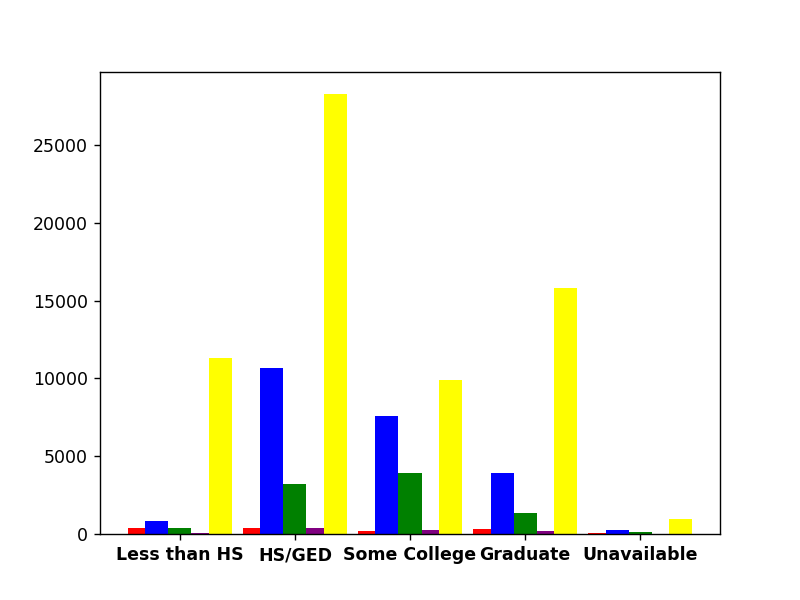

In [16]:
#Assigns the frequency values
asian_count = contingency_table.iloc[:,0]
black_count = contingency_table.iloc[:,1]
hispanic_count = contingency_table.iloc[:,2]
native_count = contingency_table.iloc[:,3]
white_count = contingency_table.iloc[:,4]

index = np.arange(len(contingency_table))

# Names of group and bar width
names = ["Less than HS", "HS/GED", "Some College", "Graduate","Unavailable"]
width = 0.20

# Create plot
fig, ax = plt.subplots()
rects1 = ax.bar(index - .35  , asian_count, width, color = "red")
rects2 = ax.bar(index - .20 , black_count, width, color = "blue")        
rects3 = ax.bar(index , hispanic_count, width, color = "green")
rects4 = ax.bar(index + .20 , native_count, width, color = "purple")    
rects5 = ax.bar(index + .35 , white_count, width, color = "yellow")
 
# Custom X axis
plt.xticks(index, names, fontweight='bold')

#Display Plot
plt.legend
plt.show()

## Age and Intent

In [17]:
# Summary for race
intent_counts = source_df['intent'].value_counts()
print(intent_counts)

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: intent, dtype: int64


<IPython.core.display.Javascript object>


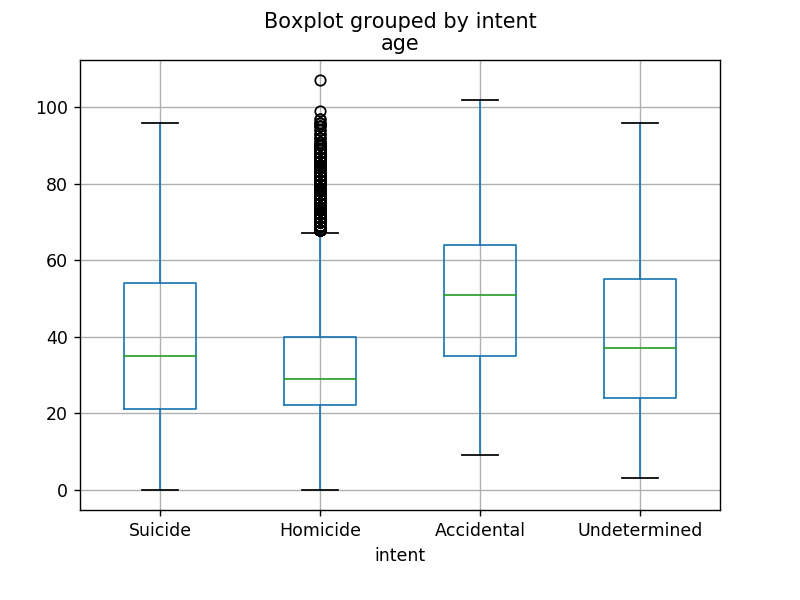

In [18]:
#Create boxplots by education level w/ age and edit parameters
bp2 = source_df.boxplot(column='age', by='intent')
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Intent by Age')
plt.xticks([1, 2, 3, 4], ["Suicide", "Homicide", "Accidental", "Undetermined"])
plt.show()

## Intent & Race 

In [19]:
#Contingency Table for test. Re-arrange 
contingency_table2 =pd.crosstab(source_df["intent"],source_df["race"])

#Display
contingency_table2

race,Asian/Pacific Islander,Black,Hispanic,Native American/Native Alaskan,White
intent,,,,,
Accidental,12,328,145,22,1132
Homicide,559,19510,5634,326,9147
Suicide,745,3332,3171,555,55372
Undetermined,10,126,72,14,585


<IPython.core.display.Javascript object>


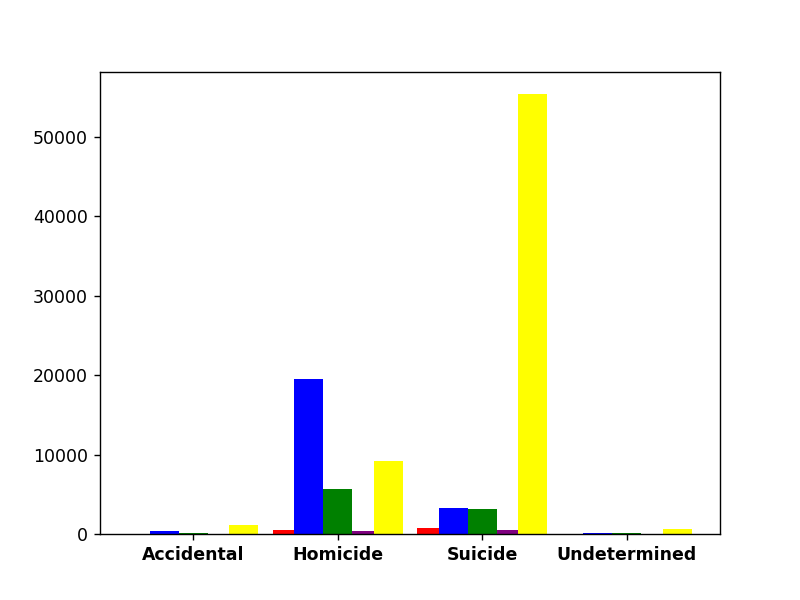

In [20]:
#Assigns the frequency values
asian_intent_count = contingency_table2.iloc[:,0]
black_intent_count = contingency_table2.iloc[:,1]
hispanic_intent_count = contingency_table2.iloc[:,2]
native_intent_count = contingency_table2.iloc[:,3]
white_intent_count = contingency_table2.iloc[:,4]

index_intent = np.arange(len(contingency_table2))

# Names of group and bar width
names2 = ["Accidental", "Homicide", "Suicide", "Undetermined"]
width2 = 0.20

# Create plot
fig, ax = plt.subplots()
rects6 = ax.bar(index_intent - .35  , asian_intent_count, width2, color = "red")
rects7 = ax.bar(index_intent - .20 , black_intent_count, width2, color = "blue")        
rects8 = ax.bar(index_intent , hispanic_intent_count, width2, color = "green")
rects9 = ax.bar(index_intent+ .20 , native_intent_count, width2, color = "purple")    
rects10 = ax.bar(index_intent + .35 , white_intent_count, width2, color = "yellow")
 
# Custom X axis
plt.xticks(index_intent, names2, fontweight='bold')

#Display Plot
plt.legend
plt.show()

In [21]:
intent_transp = contingency_table2.T
intent_transp

intent,Accidental,Homicide,Suicide,Undetermined
race,,,,
Asian/Pacific Islander,12,559,745,10
Black,328,19510,3332,126
Hispanic,145,5634,3171,72
Native American/Native Alaskan,22,326,555,14
White,1132,9147,55372,585


In [22]:
#Get rows for each race 
asian_intent_count_copy = intent_transp.iloc[0,:]
hispanic_intent_count_copy = intent_transp.iloc[2,:]
native_intent_count_copy = intent_transp.iloc[3,:]
white_intent_count_copy = intent_transp.iloc[4,:]

#Combine rows
comb_row = asian_intent_count_copy + hispanic_intent_count_copy + native_intent_count_copy + white_intent_count_copy

In [23]:
#Remove specific rows for table
intent_transp = intent_transp.drop('Asian/Pacific Islander')
intent_transp = intent_transp.drop('Hispanic')
intent_transp = intent_transp.drop('Native American/Native Alaskan')
intent_transp = intent_transp.drop('White')

In [24]:
#Create new row with combined values
intent_transp.loc['Other Races'] = comb_row
intent_transp

intent,Accidental,Homicide,Suicide,Undetermined
race,,,,
Black,328,19510,3332,126
Other Races,1311,15666,59843,681


In [47]:
#Perform Chi-Squared Test
stat,p,dof,expected = chi2_contingency(intent_transp)

#Define probability level % calculate critical value
prob = .95
crit = chi2.ppf(prob,dof)

In [48]:
print('Chi-Squared Test Results')
print('---------------------------------------------------')
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, crit, stat))
if abs(stat) >= crit:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Chi-Squared Test Results
---------------------------------------------------
probability=0.950, critical=7.815, stat=32064.513
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
